<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

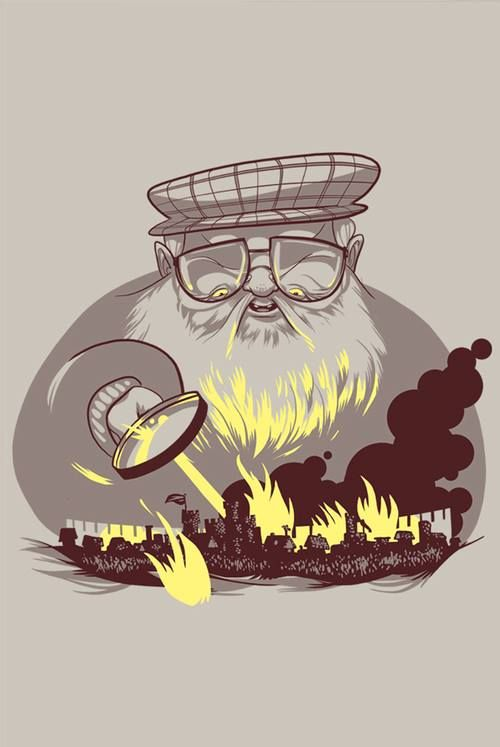

В данном задании мы будем работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Нам предстоит предсказать, кто из персонажей умрет, а кто останется в живых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

## Часть 1. Анализ и предобработка данных

* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 45.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 69.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")

In [5]:
data.describe(include='all')

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557,717,1557.000000,488,279.000000,18,22,21,1176,200,...,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
unique,1557,195,NaN,51,NaN,16,19,20,315,186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Viserys II Targaryen,Ser,NaN,Northmen,NaN,Rhaenyra Targaryen,Daemon Targaryen,Jaehaerys Targaryen,House Frey,Walder Frey,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,306,NaN,94,NaN,2,2,2,89,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.590880,NaN,247.551971,NaN,NaN,NaN,NaN,NaN,...,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,NaN,NaN,0.491829,NaN,61.550441,NaN,NaN,NaN,NaN,NaN,...,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,NaN,NaN,0.000000,NaN,-25.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,241.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,NaN,NaN,1.000000,NaN,272.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,NaN,NaN,1.000000,NaN,286.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000


In [48]:
data.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [8]:
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


<BarContainer object of 25 artists>

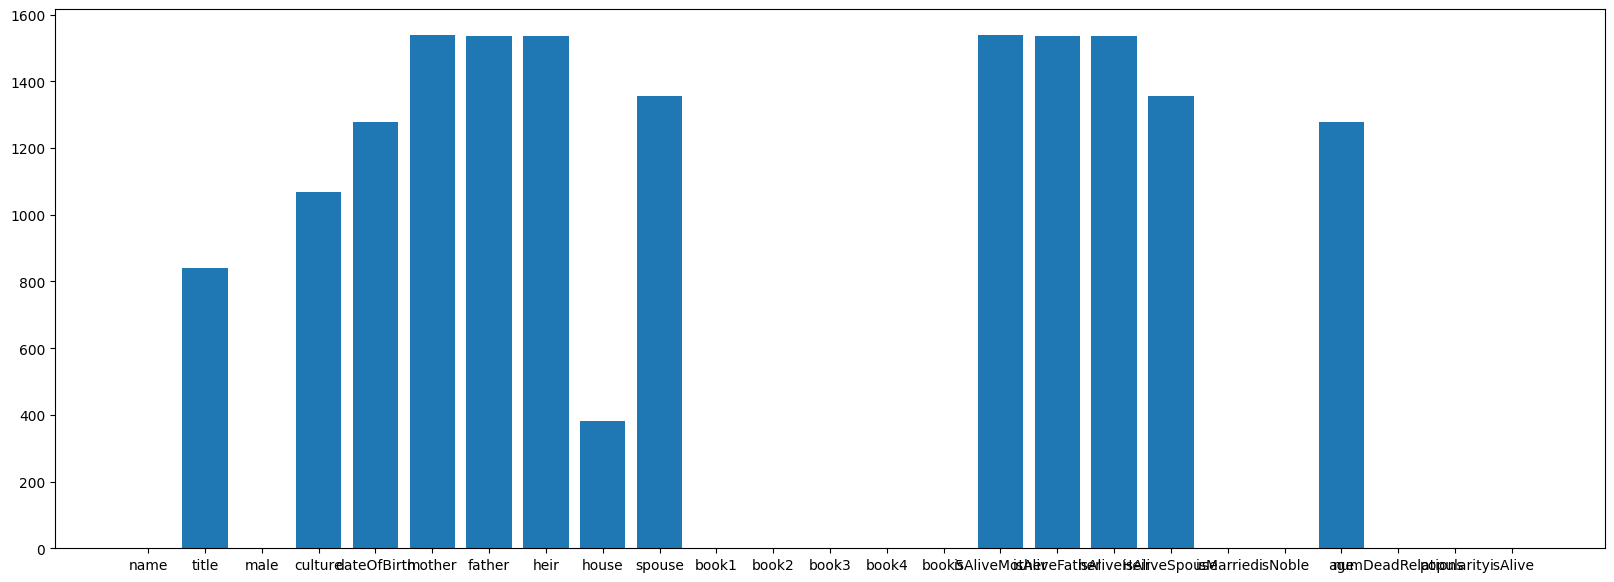

In [94]:
df = data.isna().sum(axis=0)

plt.figure(figsize=(20,7))

# plt.barh(data.index, data.values)
plt.bar(df.index, df.values)

<BarContainer object of 105 artists>

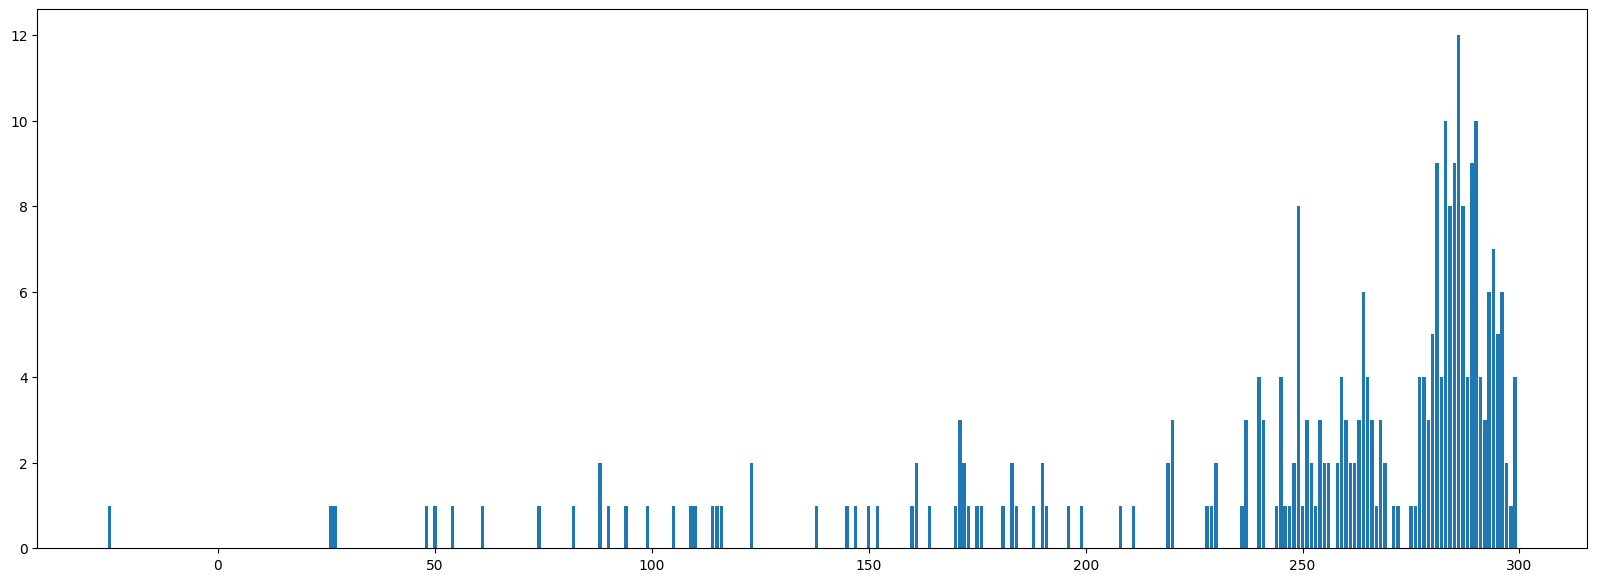

In [51]:
df = data['dateOfBirth'].value_counts()

# Нарисуем столбчатую диаграмму dateOfBirth признака
plt.figure(figsize=(20,7))
plt.bar(df.index, df.values)

<BarContainer object of 72 artists>

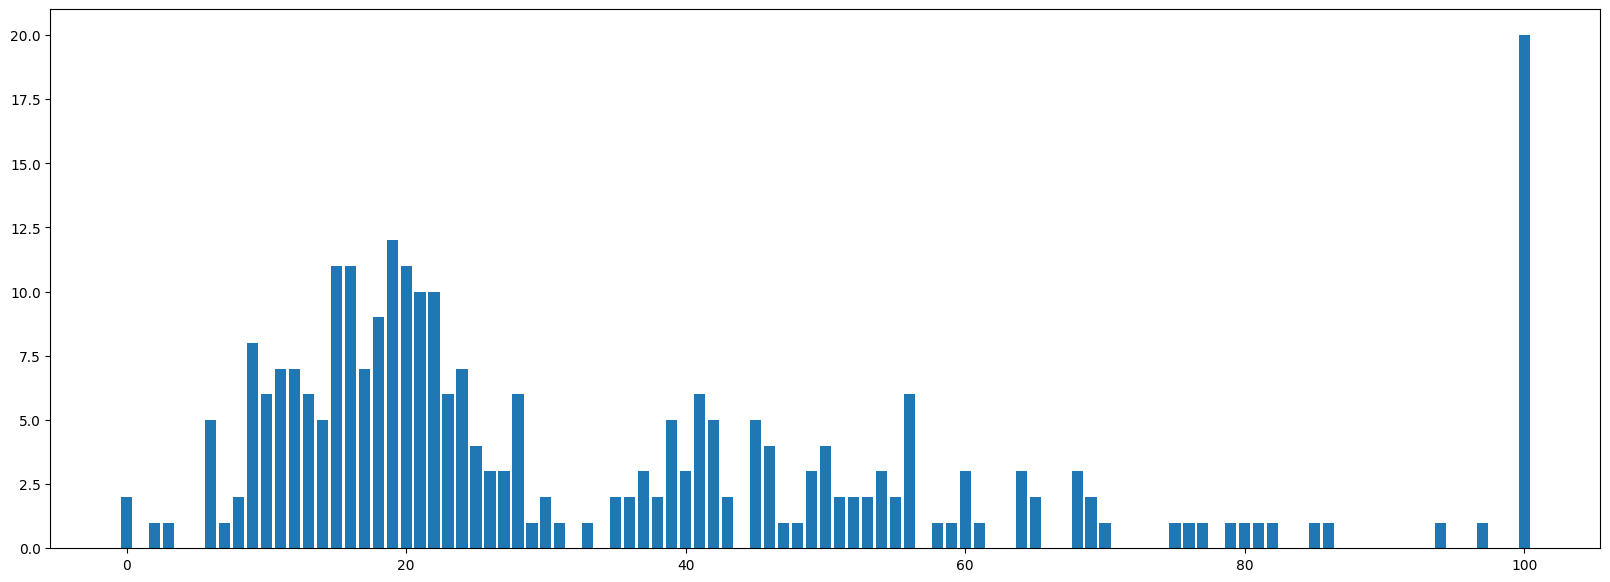

In [52]:
df = data['age'].value_counts()

# Нарисуем столбчатую диаграмму age признака
plt.figure(figsize=(20,7))
plt.bar(df.index, df.values)

In [6]:
mean_age = np.mean(data['age'].dropna().values)
mode_age = data['age'].mode()
median_age = np.quantile(data['age'].dropna().values,q=0.5)
print(f"Среднее age  = {mean_age}")
print(f"Мода age  = {mode_age}")
print(f"Медиана age = {median_age}")

mean_date = np.mean(data['dateOfBirth'].dropna().values)
mode_date = data['dateOfBirth'].mode()
median_date = np.quantile(data['dateOfBirth'].dropna().values,q=0.5)
print(f"Среднее dateOfBirth  = {mean_date}")
print(f"Мода dateOfBirth  = {mode_date}")
print(f"Медиана dateOfBirth = {median_date}")

Среднее age  = 35.29032258064516
Мода age  = 0    100.0
Name: age, dtype: float64
Медиана age = 24.0
Среднее dateOfBirth  = 247.55197132616487
Мода dateOfBirth  = 0    286.0
Name: dateOfBirth, dtype: float64
Медиана dateOfBirth = 272.0


In [7]:
# Видно, что для параметра age лучше подходит среднее значение, а для dateOfBirth - мода (хотя тут спорно, медиана тоже неплохо). Поэтому:
data['age'] = data['age'].fillna(mean_age)
data['dateOfBirth'] = data['dateOfBirth'].fillna(float(mode_date.iloc[0]))

<BarContainer object of 195 artists>

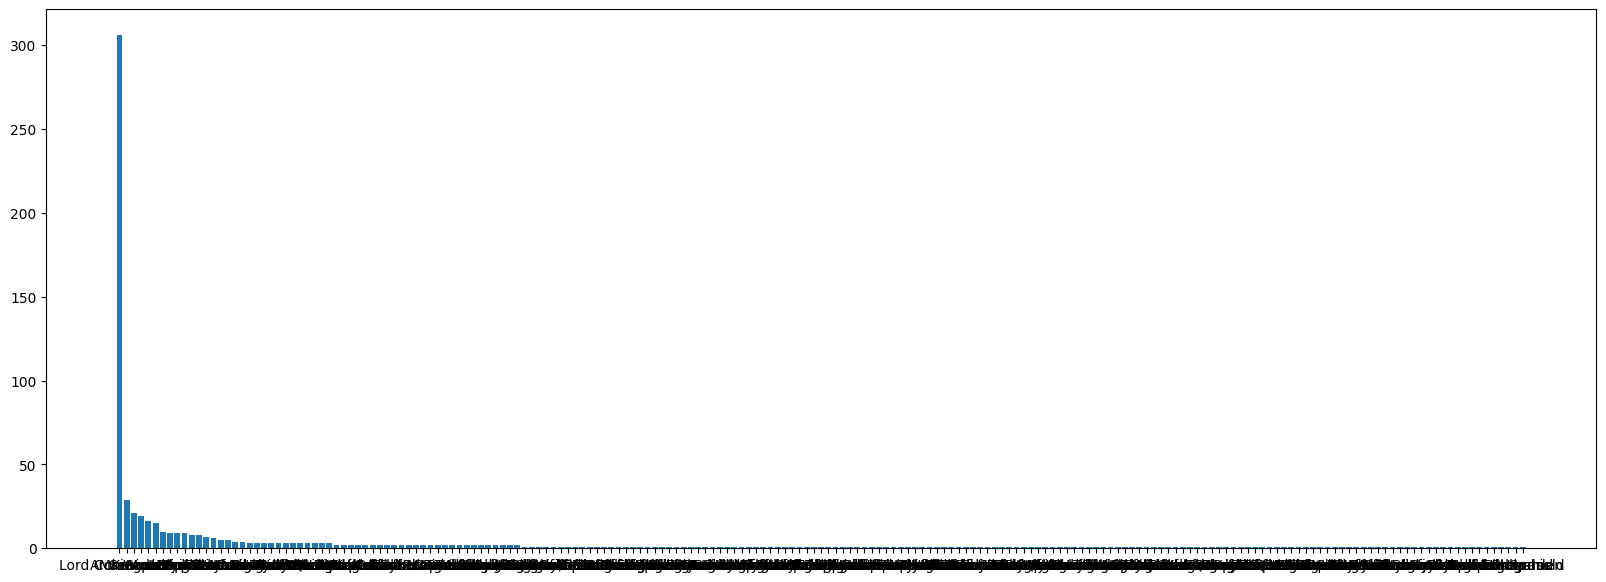

In [8]:
df = data['title'].value_counts()

# Нарисуем столбчатую диаграмму title признака
plt.figure(figsize=(20,7))
plt.bar(df.index, df.values)

In [58]:
# тут (с title) происходит что-то сомнительное, поэтому удалим этот столбец

Создаём новые признаки.
* Признак isPopular. У нас есть в таблице признак popularity score, поставлю порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упрощаю признак culture, объединив схожие названия в один.


In [9]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [10]:
data['isPopular'] = data.popularity > 0.024
data['isPopular'] = data['isPopular'].map({True: 1, False: 0})
data['boolDeadRelations'] = data.numDeadRelations > 0
data['boolDeadRelations'] = data['boolDeadRelations'].map({True: 1, False: 0})

In [11]:
def standardize_names(value, replacement_dict):
    value = str(value).lower()  # Convert to lowercase string
    for standard, variants in replacement_dict.items():
        if value in variants or value == standard.lower():
            return standard  # Return the key as-is, preserving specific capitalization
    return value.title()  # If no match found, return the original value with first letters capitalized

data['culture'] = data['culture'].apply(lambda x: standardize_names(x, cult))
# data

,culture
0,Northmen


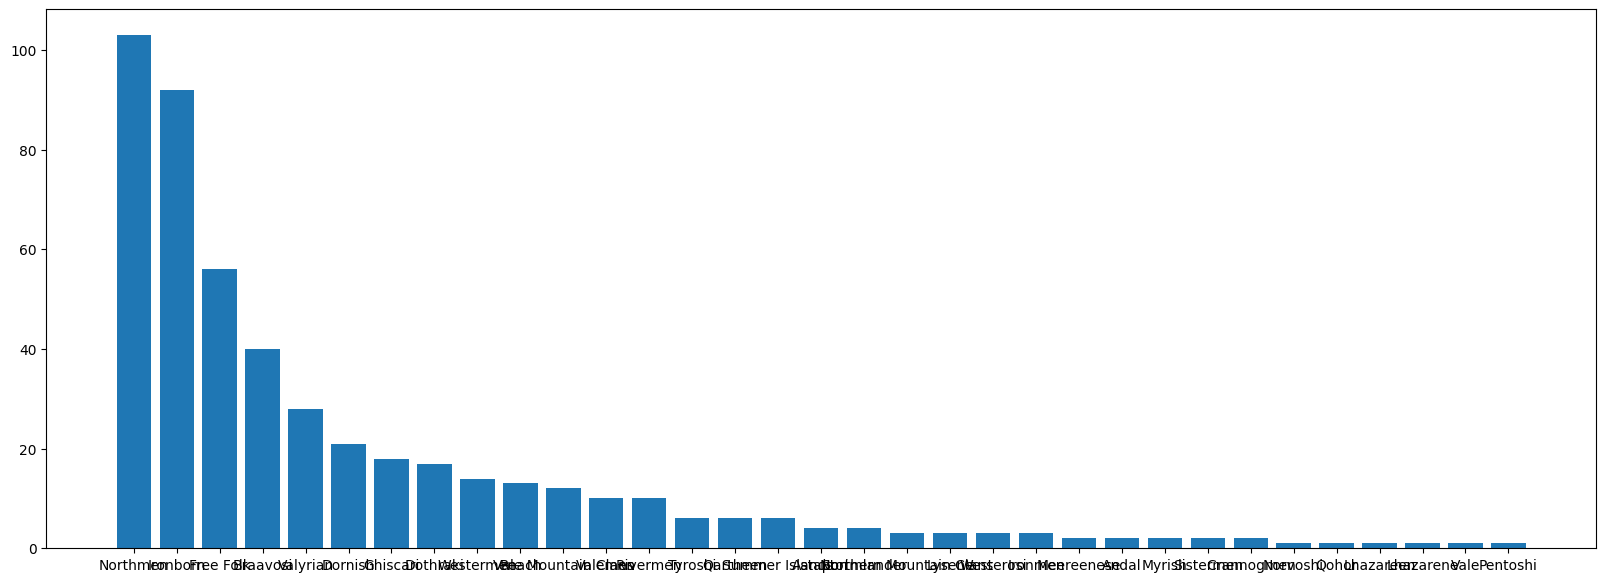

In [12]:
def is_not_nan(x):
    return pd.notna(x) and x != '' and x != 'Nan'  # my NaN's converted to Nan's after applying the function from the previous cell

# Filter the DataFrame
df_0 = data[data['culture'].apply(is_not_nan)]
df = data[data['culture'].apply(is_not_nan)].culture.value_counts()

# Нарисуем столбчатую диаграмму culture признака
plt.figure(figsize=(20,7))
plt.bar(df.index, df.values)
# df

culture_mode = df_0['culture'].mode()
culture_mode

In [13]:
# немного спорное действие: глядя на график выше, давайте.. заменим все NaN'ы на Northmen'ов
data['culture'] = data['culture'].replace('Nan', 'Northmen')
# data

Анализируем, какие столбцы являются существенными и влияют на предсказание, а какие нет.

In [14]:
columns_to_drop = [
    'name', 'house', 'isMarried', 'isAliveFather', 'isAliveHeir',
    'isAliveMother', 'mother', 'father', 'heir', 'spouse', 'isAliveSpouse',
    'title', 'popularity', 'numDeadRelations'
    ]
data.drop(columns=columns_to_drop, inplace=True)

In [15]:
data.isna().sum()

,0
male,0
culture,0
dateOfBirth,0
book1,0
book2,0
book3,0
book4,0
book5,0
isNoble,0
age,0


Ура! Вроде всё почистили)

Анализируем целевую переменную

In [16]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


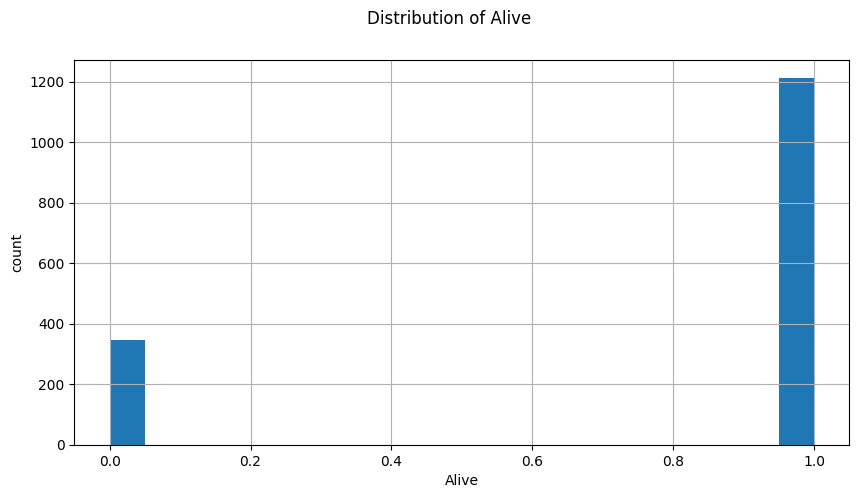

In [137]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alive')
plt.show()

Классы более-менее сбалансированы, пойдёт

Анализируем признаки

In [139]:
data.head()

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1,1,Northmen,286.0,0,0,0,0,0,0,35.290323,0,1,1
2,1,Rivermen,208.0,1,1,1,1,1,1,97.000000,1,1,1
3,1,Northmen,286.0,0,0,0,1,0,1,35.290323,1,1,0
4,0,Northmen,82.0,0,0,0,0,0,1,23.000000,0,1,0
5,0,Dornish,276.0,0,0,0,1,0,1,29.000000,1,1,0


In [17]:
categorical_columns = ['culture']
categorical_features = data[categorical_columns]
# categorical_features

In [18]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data.index)

# one_hot_df.shape

In [19]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
df_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isNoble,age,isAlive,...,culture_Sistermen,culture_Stormlander,culture_Summer Islands,culture_Tyroshi,culture_Vale,culture_Vale Mountain Clans,culture_Valemen,culture_Valyrian,culture_Westermen,culture_Westerosi
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,286.0,0,0,0,0,0,0,35.290323,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.0,1,1,1,1,1,1,97.000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,286.0,0,0,0,1,0,1,35.290323,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.0,0,0,0,0,0,1,23.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.0,0,0,0,1,0,1,29.000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,286.0,1,0,1,1,0,1,35.290323,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,286.0,1,1,0,0,0,0,35.290323,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,286.0,0,1,1,1,1,0,35.290323,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Теперь численные признаки

In [20]:
numerical_columns = [
    'male', 'dateOfBirth', 'book1', 'book2', 'book3', 'book4', 'book5',
    'isNoble', 'age', 'boolDeadRelations', 'isPopular'
    ]

num_features = data[numerical_columns]

print("Количество количественных признаков: ", len(num_features.columns))

# num_features

Количество количественных признаков:  11


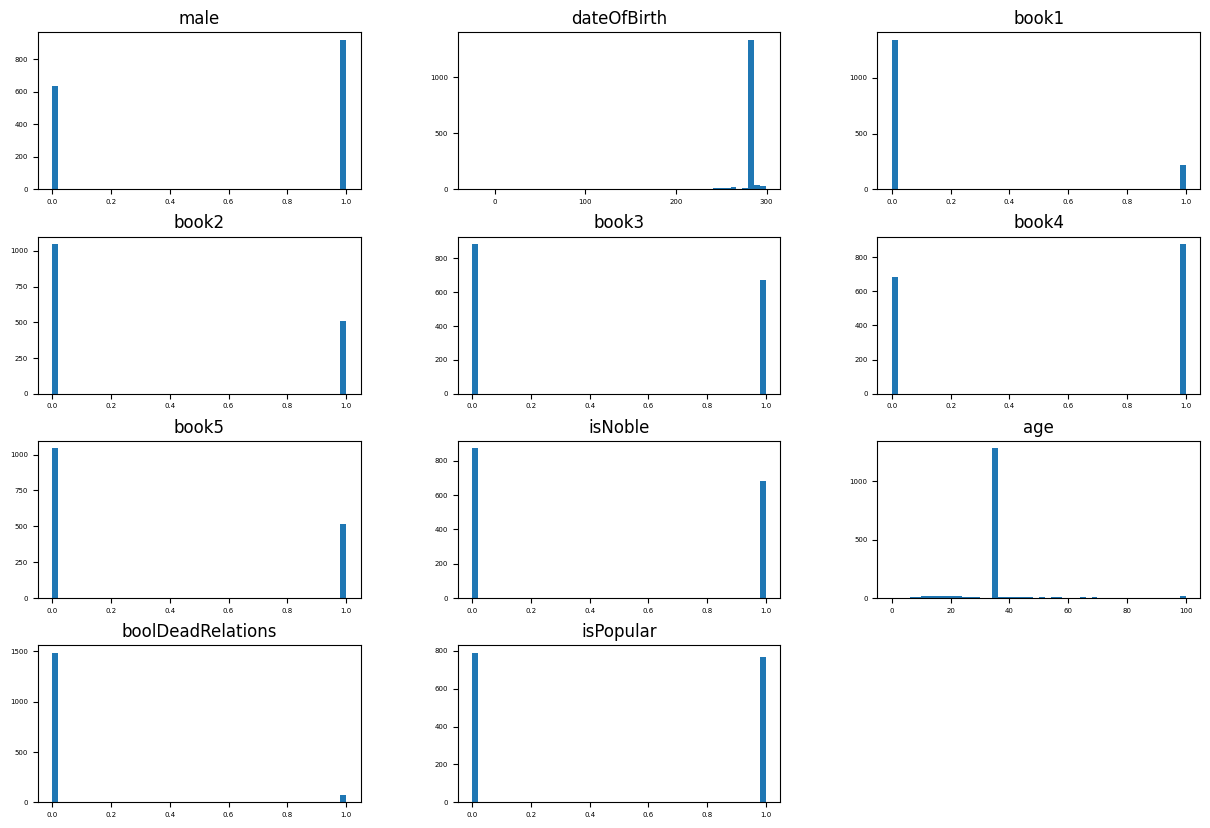

In [162]:
# Распределения
num_features.hist(
    figsize=(15, 10), bins=50,xlabelsize=5, ylabelsize=5,
    grid=False
    );

In [33]:
data_without_title = data.drop(columns=['culture'])

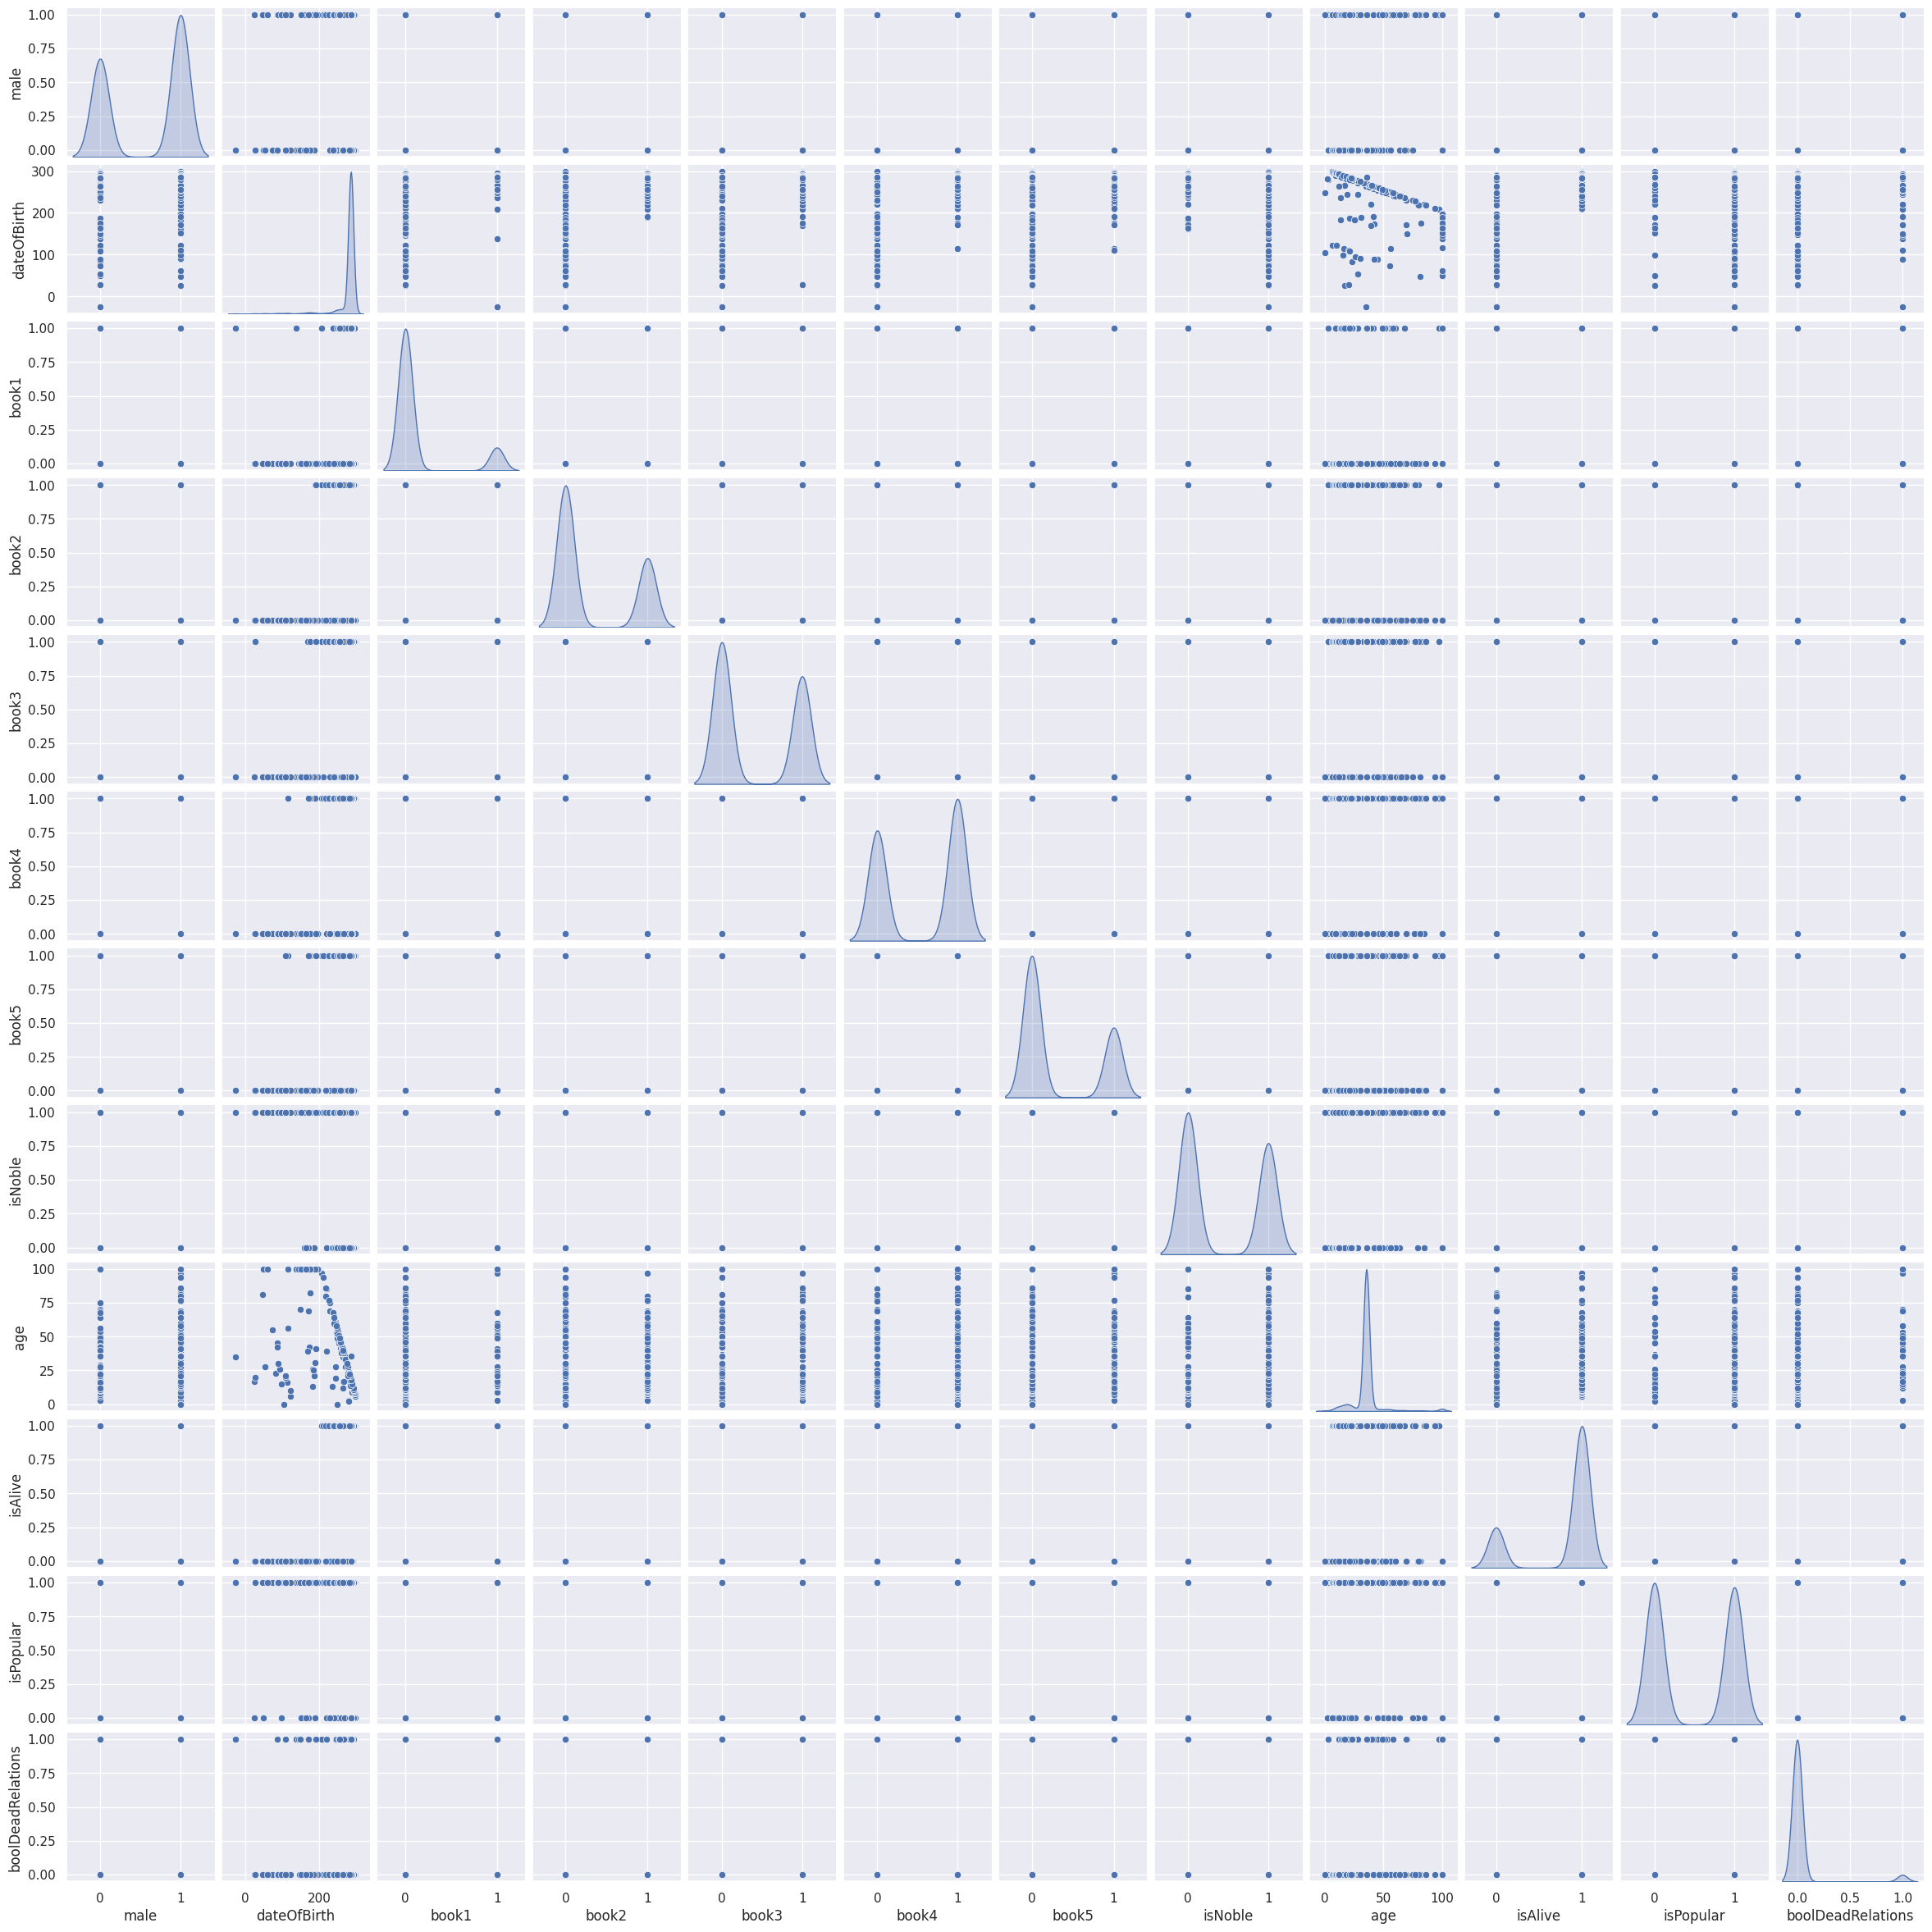

In [34]:
sns.set()
sns.pairplot(data_without_title, height = 2, kind ='scatter', diag_kind='kde') # взаимные графики на многих признаках
plt.show()

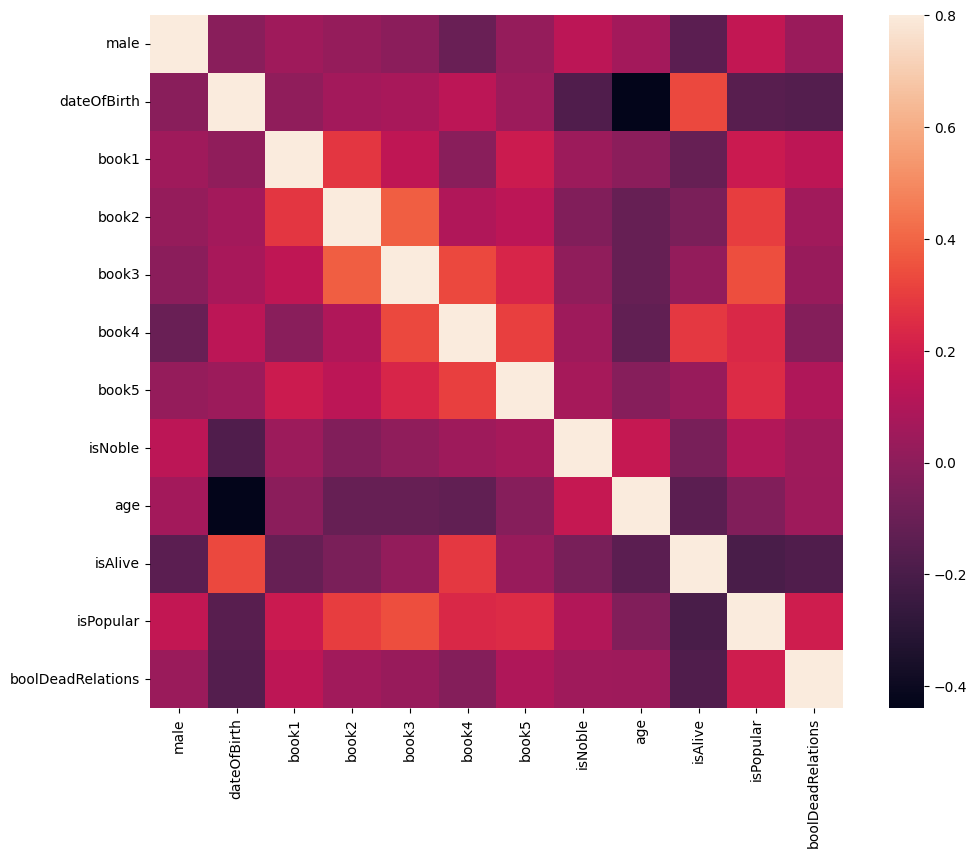

In [22]:
corrmat = data_without_title.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

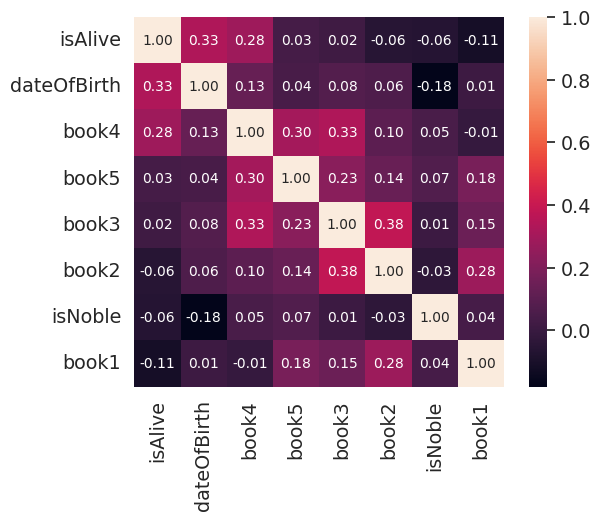

In [23]:
# correlation matrix
k = 8 # number of variables for heatmap
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_without_title[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Аанализируем влияние признаков на целевую переменную.

In [24]:
data_without_title[data_without_title['book4'] == 1]['isAlive'].value_counts()

,count
isAlive,
1,773
0,103


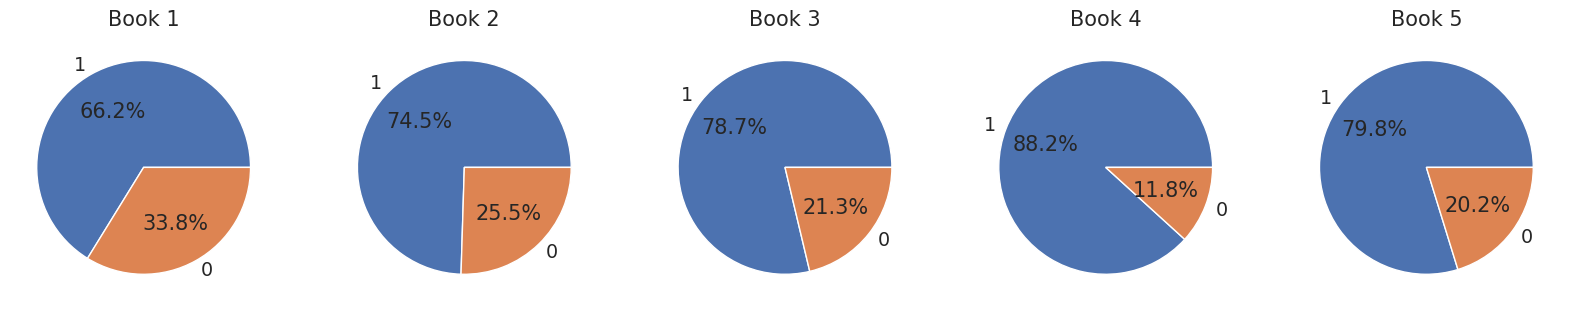

In [27]:
# Готовим данные для графика
data1 = data_without_title[data_without_title['book1'] == 1]['isAlive'].value_counts()
data2 = data_without_title[data_without_title['book2'] == 1]['isAlive'].value_counts()
data3 = data_without_title[data_without_title['book3'] == 1]['isAlive'].value_counts()
data4 = data_without_title[data_without_title['book4'] == 1]['isAlive'].value_counts()
data5 = data_without_title[data_without_title['book5'] == 1]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,15))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')


ax1.set_title("Book 1")
ax2.set_title("Book 2")
ax3.set_title("Book 3")
ax4.set_title("Book 4")
ax5.set_title("Book 5")


# plt.legend(['Alive', 'Not alive'])

plt.show()

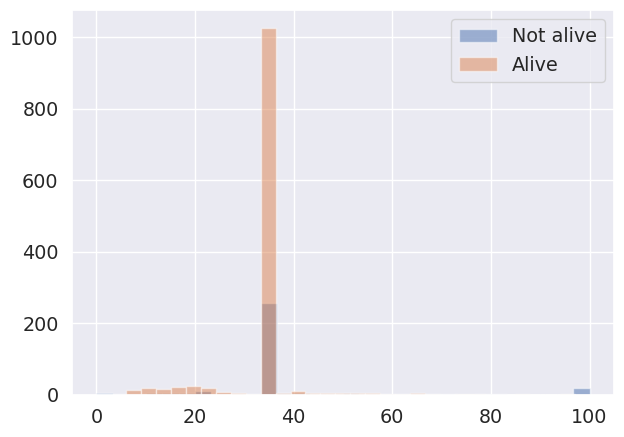

In [32]:
plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='Not alive', bins=30)
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='Alive', bins=30)

plt.legend(['Not alive', 'Alive'])

plt.show()

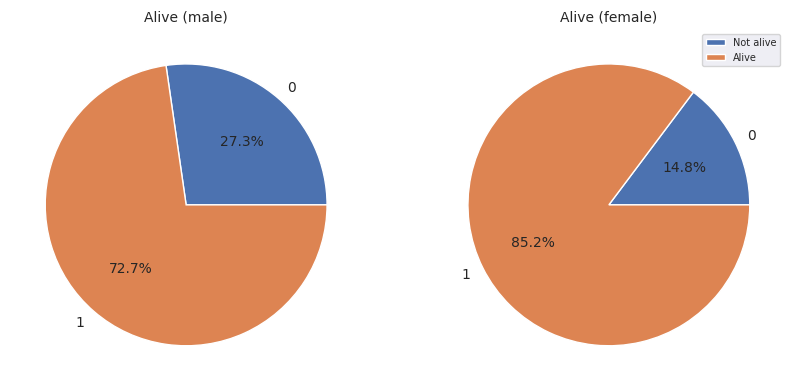

In [37]:
# female - 0, male - 1
data_1 = data[data['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Alive (male)', fontsize=10)
ax2.set_title('Alive (female)', fontsize=10)

plt.legend(['Not alive', 'Alive'], fontsize=7)

plt.show()

Как-то мужчины чаще живые...

In [40]:
data

,male,culture,dateOfBirth,book1,book2,book3,book4,book5,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,
1,1,Northmen,286.0,0,0,0,0,0,0,35.290323,0,1,1
2,1,Rivermen,208.0,1,1,1,1,1,1,97.000000,1,1,1
3,1,Northmen,286.0,0,0,0,1,0,1,35.290323,1,1,0
4,0,Northmen,82.0,0,0,0,0,0,1,23.000000,0,1,0
5,0,Dornish,276.0,0,0,0,1,0,1,29.000000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,Northmen,286.0,1,0,1,1,0,1,35.290323,1,1,0
1554,0,Northmen,286.0,1,1,0,0,0,0,35.290323,0,1,0
1555,1,Northmen,286.0,0,1,1,1,1,0,35.290323,0,1,0


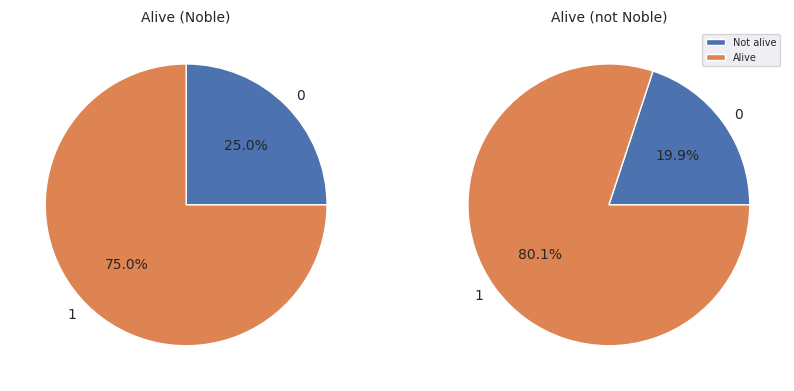

In [41]:
# not noble - 0, noble - 1
data_1 = data[data['isNoble']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isNoble']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Alive (Noble)', fontsize=10)
ax2.set_title('Alive (not Noble)', fontsize=10)

plt.legend(['Not alive', 'Alive'], fontsize=7)

plt.show()

Тут как будто бы без разницы

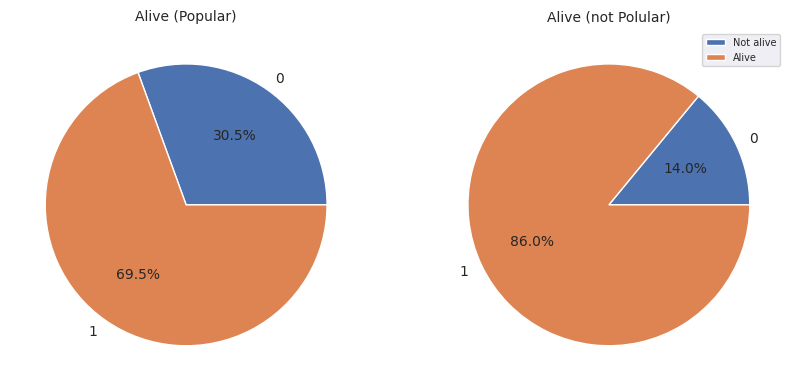

In [43]:
# not noble - 0, noble - 1
data_1 = data[data['isPopular']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isPopular']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Alive (Popular)', fontsize=10)
ax2.set_title('Alive (not Polular)', fontsize=10)

plt.legend(['Not alive', 'Alive'], fontsize=7)

plt.show()

О, а это интересно: непопулярные персонажи статистически чаще живые

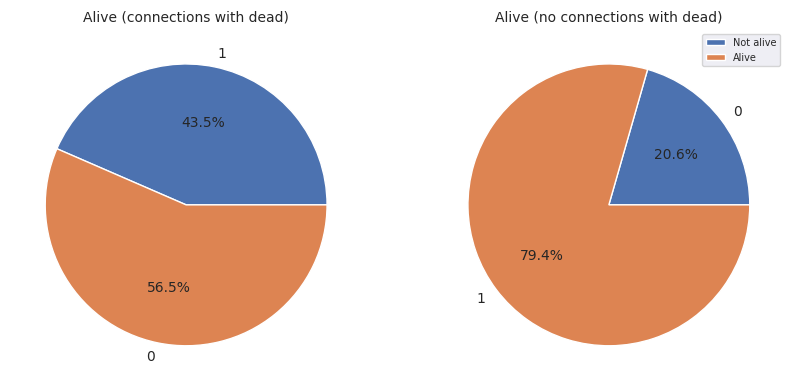

In [45]:
# no connections with dead - 0, 1+ connections with dead - 1
data_1 = data[data['boolDeadRelations']== 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['boolDeadRelations']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Alive (connections with dead)', fontsize=10)
ax2.set_title('Alive (no connections with dead)', fontsize=10)

plt.legend(['Not alive', 'Alive'], fontsize=7)

plt.show()

Вот тут тоже интересно - те, у кого были связи с умершими персонажами, статистически сильно чаще уже мертвы

Создаём переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [48]:
X = df_encoded.drop(columns=['isAlive']).values
y = df_encoded['isAlive'].values

In [49]:
from sklearn.model_selection import train_test_split

In [154]:
X_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")
X_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [155]:
X_test.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [156]:
X_test.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
count,389.000000,154.000000,389.000000,389.000000,389.000000,389.000000,389.000000,3.0,4.0,2.000000,76.00000,389.000000,389.000000,154.000000,389.00000,389.000000
mean,0.732648,3986.571429,0.437018,0.562982,0.676093,0.709512,0.655527,1.0,0.0,0.500000,0.75000,0.195373,0.547558,-3701.032468,0.77892,0.198391
std,0.443148,32738.182560,0.496656,0.496656,0.468568,0.454572,0.475808,0.0,0.0,0.707107,0.43589,0.396998,0.498374,32736.656684,2.08269,0.235136
min,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.00000,0.000000,0.000000,-298001.000000,0.00000,0.000000
25%,0.000000,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.250000,0.75000,0.000000,0.000000,21.000000,0.00000,0.050167
50%,1.000000,267.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.500000,1.00000,0.000000,1.000000,32.000000,0.00000,0.103679
75%,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.750000,1.00000,0.000000,1.000000,53.750000,0.00000,0.230769
max,1.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.00000,1.000000,1.000000,100.000000,15.00000,1.000000


Кажется, в тестовом датасете происходит что-то крайне сомнительное с колонками age и dateOfBirth, поэтому их всё-таки удалю

In [157]:
mean_age = np.mean(X_test['age'].dropna().values)
mode_date = X_test['dateOfBirth'].mode()

X_test['age'] = X_test['age'].fillna(mean_age)
X_test['dateOfBirth'] = X_test['dateOfBirth'].fillna(float(mode_date.iloc[0]))

X_test['isPopular'] = X_test['popularity'] > 0.024
X_test['isPopular'] = X_test['isPopular'].map({True: 1, False: 0})
X_test['boolDeadRelations'] = X_test.numDeadRelations > 0
X_test['boolDeadRelations'] = X_test['boolDeadRelations'].map({True: 1, False: 0})

X_test['culture'] = X_test['culture'].apply(lambda x: standardize_names(x, cult))

X_test_df0 = X_test[X_test['culture'].apply(is_not_nan)]
X_test_df = X_test[X_test['culture'].apply(is_not_nan)].culture.value_counts()
culture_mode = X_test_df0['culture'].mode()

X_test['culture'] = X_test['culture'].replace('Nan', 'Northmen')

columns_to_drop = [
    'name', 'house', 'isMarried', 'isAliveFather', 'isAliveHeir',
    'isAliveMother', 'mother', 'father', 'heir', 'spouse', 'isAliveSpouse',
    'title', 'popularity', 'numDeadRelations', 'age', 'dateOfBirth'
    ]
X_test.drop(columns=columns_to_drop, inplace=True)

numerical_columns = [
    'male', 'book1', 'book2', 'book3', 'book4', 'book5',
    'isNoble', 'boolDeadRelations', 'isPopular'
    ]

categorical_columns = ['culture']
categorical_features = X_test[categorical_columns]

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(X_test[categorical_columns])

one_hot_df_X_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=X_test.index)

df_encoded_X_test = pd.concat([X_test, one_hot_df_X_test], axis=1)

df_encoded_X_test = df_encoded_X_test.drop(categorical_columns, axis=1)

num_features = X_test[numerical_columns]

In [77]:
columns_to_drop_v2 = ['age', 'dateOfBirth']
data.drop(columns=columns_to_drop_v2, inplace=True)
df_encoded.drop(columns=columns_to_drop_v2, inplace=True)

Поскольку мы изменили data df_encoded, нужно переписать X и y

In [85]:
X = df_encoded.drop(columns=['isAlive']).values
y = df_encoded['isAlive'].values

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

Тут мы хотим научиться обучать модели для задачи классификации на наших данных.

Будем использовать следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Первым делом импортируем модель `LogisticRegression`

In [78]:
from sklearn.linear_model import LogisticRegression

Импортируем остальные библиотеки

In [89]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
# Выход pca - numpy матрица, положим ее в новую переменную со всеми фичами
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
print('До масштабирования: ',X_train.mean(axis=0))
print('После масштабирования: ',X_train_scaled.mean(axis=0))

До масштабирования:  [0.59518072 0.14216867 0.32449799 0.42811245 0.55502008 0.31566265
 0.44899598 0.48514056 0.04578313 0.00160643 0.00321285 0.02570281
 0.00160643 0.01365462 0.01285141 0.037751   0.01285141 0.05702811
 0.00080321 0.00080321 0.00080321 0.00240964 0.00080321 0.00160643
 0.00240964 0.74939759 0.00080321 0.00080321 0.00401606 0.
 0.00963855 0.0064257  0.00160643 0.00321285 0.00401606 0.00240964
 0.00080321 0.00722892 0.00401606 0.01767068 0.01044177 0.00160643]
После масштабирования:  [-3.50277594e-16  1.00499707e-16  1.07901194e-16 -5.20779314e-17
  7.18746793e-17 -7.40148683e-17 -1.93865450e-16  5.82309747e-17
  1.30596114e-16 -4.59783929e-16 -2.97597734e-16 -2.42108876e-17
 -2.93384237e-16  3.05199864e-16 -1.52510757e-16 -2.82148245e-16
  1.50482036e-16  2.15044404e-16  6.45623671e-17  5.31480259e-17
 -1.64945032e-16  1.79853901e-16  2.22830456e-16 -6.22728107e-16
  1.24253575e-16  5.81328827e-16  6.28686081e-16  2.50781100e-16
 -1.37328792e-16  0.00000000e+00  8.19

Хм... Не уверена, что стоит использовать отмасштабированные фичи...

Обучаем модель и делаем предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [112]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

Аналогичным образом обучаем остальные модели и делаем предсказания на тестовой выборке.

In [113]:
# AdaBoostClassifier

# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(algorithm='SAMME')

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

In [114]:
# RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_randf = random_forest.predict(X_test)

In [115]:
# GaussianProcessClassifier

gaussian = GaussianProcessClassifier()
gaussian.fit(X_train, y_train)
y_pred_gauss = gaussian.predict(X_test)

In [116]:
# GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred_bayes = bayes.predict(X_test)

In [117]:
# KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [118]:
# SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [119]:
# DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Часть 3. Оценка качества моделей

Для простоты в данном задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

Считаем метрику для всех моделей и выбираем лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [120]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [121]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (LogisticRegression) : %.4f" % accuracy_lr)

Accuracy (LogisticRegression) : 0.8333


Аналогичным образом считаем метрику accuracy для остальных моделей

In [122]:
# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy (AdaBoostClassifier): %.4f" % accuracy_ada)

accuracy_randf = accuracy_score(y_test, y_pred_randf)
print("Accuracy (RandomForestClassifier): %.4f" % accuracy_randf)

accuracy_gauss = accuracy_score(y_test, y_pred_gauss)
print("Accuracy (GaussianProcessClassifier): %.4f" % accuracy_gauss)

accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy (GaussianNB): %.4f" % accuracy_bayes)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNeighborsClassifier): %.4f" % accuracy_knn)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVC): %.4f" % accuracy_svm)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy (DecisionTreeClassifier): %.4f" % accuracy_tree)

Accuracy (AdaBoostClassifier): 0.8365
Accuracy (RandomForestClassifier): 0.8333
Accuracy (GaussianProcessClassifier): 0.8397
Accuracy (GaussianNB): 0.2436
Accuracy (KNeighborsClassifier): 0.8141
Accuracy (SVC): 0.8429
Accuracy (DecisionTreeClassifier): 0.8269


Выберите лучшую модель.

SVC :)

Попробуем оптимизировать параметры, начав с DecisionTreeClassifier

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

In [135]:
# заново создадим модель
model = DecisionTreeClassifier()

# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 20), # также можно указать обычный массив, [1, 2, 3, 4]
    'min_samples_leaf': np.arange(1, 20),
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(r2_score))

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, best_model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, best_model.predict(X_test))}')
print(f'Accuracy = {accuracy_score(y_test, best_model.predict(X_test))}')

{'max_depth': 9, 'min_samples_leaf': 8}
MSE train = 0.17269076305220885
MSE test = 0.1762820512820513
Accuracy = 0.8237179487179487


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Как-то на DecisionTreeClassifier результаты особо не поменялись... Ну и ладно. Побеждает, в общем, SVC ))

Применим нашу модель к тестовым данным

In [153]:
# df_encoded.drop(columns=['isAlive']).values
df_encoded.drop(columns=['isAlive']).columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isNoble',
       'isPopular', 'boolDeadRelations', 'culture_Andal', 'culture_Astapori',
       'culture_Braavosi', 'culture_Crannogmen', 'culture_Dornish',
       'culture_Dothraki', 'culture_Free Folk', 'culture_Ghiscari',
       'culture_Ironborn', 'culture_Ironmen', 'culture_Lhazareen',
       'culture_Lhazarene', 'culture_Lysene', 'culture_Meereenese',
       'culture_Myrish', 'culture_Northern Mountain Clans', 'culture_Northmen',
       'culture_Norvoshi', 'culture_Pentoshi', 'culture_Qartheen',
       'culture_Qohor', 'culture_Reach', 'culture_Rivermen',
       'culture_Sistermen', 'culture_Stormlander', 'culture_Summer Islands',
       'culture_Tyroshi', 'culture_Vale', 'culture_Vale Mountain Clans',
       'culture_Valemen', 'culture_Valyrian', 'culture_Westermen',
       'culture_Westerosi'],
      dtype='object')

In [152]:
df_encoded_X_test.columns

Index(['S.No', 'male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isNoble',
       'isPopular', 'boolDeadRelations', 'culture_Asshai', 'culture_Astapor',
       'culture_Braavosi', 'culture_Crannogmen', 'culture_Dornish',
       'culture_Dothraki', 'culture_Free Folk', 'culture_Ghiscari',
       'culture_Ibbenese', 'culture_Ironborn', 'culture_Ironmen',
       'culture_Lhazareen', 'culture_Lysene', 'culture_Meereen',
       'culture_Meereenese', 'culture_Myrish', 'culture_Naathi',
       'culture_Northern Mountain Clans', 'culture_Northmen',
       'culture_Norvoshi', 'culture_Pentoshi', 'culture_Qartheen',
       'culture_Qohor', 'culture_Reach', 'culture_Rhoynar',
       'culture_Riverlands', 'culture_Rivermen', 'culture_Stormlander',
       'culture_Summer Islands', 'culture_Tyroshi',
       'culture_Vale Mountain Clans', 'culture_Valemen', 'culture_Valyrian',
       'culture_Westermen', 'culture_Westerosi', 'culture_Wildlings'],
      dtype='object')

Ага, у нас разные наборы культур... Вот незадача... Ну, тогда я объединю все имеющиеся в тесте и трейне культуры и попробую заново

In [203]:
all_columns = df_encoded.columns.union(df_encoded_X_test.columns)

# Function to add missing columns to a DataFrame and fill with zeros
def add_missing_columns(df, all_columns):
    missing_columns = all_columns.difference(df.columns)
    for col in missing_columns:
        df[col] = 0.0
    return df.reindex(columns=all_columns)

# Add missing columns to df1 and df2
df_encoded = add_missing_columns(df_encoded, all_columns)
df_encoded_X_test = add_missing_columns(df_encoded_X_test, all_columns)


# Verify that both DataFrames have the same columns
print("\nBoth DataFrames have the same columns:", df_encoded.columns.equals(df_encoded_X_test.columns))


Both DataFrames have the same columns: True


In [261]:
X = df_encoded.drop(columns=['isAlive']).values
y = df_encoded['isAlive'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

# AdaBoostClassifier
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9, n_estimators=27)

# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

# RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=37)
random_forest.fit(X_train, y_train)
y_pred_randf = random_forest.predict(X_test)

# GaussianProcessClassifier
gaussian = GaussianProcessClassifier(max_iter_predict=4)
gaussian.fit(X_train, y_train)
y_pred_gauss = gaussian.predict(X_test)

# GaussianNB
bayes = GaussianNB(var_smoothing=0.37)
bayes.fit(X_train, y_train)
y_pred_bayes = bayes.predict(X_test)

# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# SVC
svm = SVC(C=1.2)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (LogisticRegression) : %.4f" % accuracy_lr)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy (AdaBoostClassifier): %.4f" % accuracy_ada)

accuracy_randf = accuracy_score(y_test, y_pred_randf)
print("Accuracy (RandomForestClassifier): %.4f" % accuracy_randf)

accuracy_gauss = accuracy_score(y_test, y_pred_gauss)
print("Accuracy (GaussianProcessClassifier): %.4f" % accuracy_gauss)

accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy (GaussianNB): %.4f" % accuracy_bayes)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNeighborsClassifier): %.4f" % accuracy_knn)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVC): %.4f" % accuracy_svm)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy (DecisionTreeClassifier): %.4f" % accuracy_tree)

Accuracy (LogisticRegression) : 0.8269
Accuracy (AdaBoostClassifier): 0.8141
Accuracy (RandomForestClassifier): 0.8365
Accuracy (GaussianProcessClassifier): 0.8397
Accuracy (GaussianNB): 0.7981
Accuracy (KNeighborsClassifier): 0.8205
Accuracy (SVC): 0.8365
Accuracy (DecisionTreeClassifier): 0.8365


In [235]:
# заново создадим модель
model = LogisticRegression()

# опишем сетку, по которой будем искать
param_grid = {
    'C': np.arange(0, 5), # также можно указать обычный массив, [1, 2, 3, 4]
}

# создадим объект GridSearchCV
gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}');

{'C': 1}
Accuracy train = 0.8248995983935743
Accuracy test = 0.7916666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

In [238]:
model = AdaBoostClassifier()

param_grid = {
    'n_estimators': np.arange(0, 50), # также можно указать обычный массив, [1, 2, 3, 4]
    'learning_rate': np.arange(0, 1, 0.1),
    'algorithm': ['SAMME']
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

{'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 27}
Accuracy train = 0.8088353413654619
Accuracy test = 0.7948717948717948


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
295 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [259]:
model = RandomForestClassifier()

param_grid = {
    # 'n_estimators': np.arange(0, 60), # также можно указать обычный массив, [1, 2, 3, 4]
    # 'max_depth': np.arange(0, 40),
    'min_samples_leaf': np.arange(0, 6)
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

{'min_samples_leaf': 2}
Accuracy train = 0.8377510040160643
Accuracy test = 0.8301282051282052


In [250]:
model = GaussianProcessClassifier()

param_grid = {
    'max_iter_predict': np.arange(0, 10), # также можно указать обычный массив, [1, 2, 3, 4]
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

{'max_iter_predict': 4}
Accuracy train = 0.8393574297188755
Accuracy test = 0.8012820512820513


In [245]:
model = GaussianNB()

param_grid = {
    'var_smoothing': np.logspace(np.log10(1e-11), np.log10(1e1), num=1000), # также можно указать обычный массив, [1, 2, 3, 4]
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

{'var_smoothing': 0.3720236681413066}
Accuracy train = 0.8112449799196787
Accuracy test = 0.7724358974358975


In [246]:
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': np.arange(0, 100), # также можно указать обычный массив, [1, 2, 3, 4]
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

{'n_neighbors': 11}
Accuracy train = 0.8313253012048193
Accuracy test = 0.7980769230769231


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

In [247]:
model = SVC()

param_grid = {
    'C': np.arange(0, 2, 0.1), # также можно указать обычный массив, [1, 2, 3, 4]
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

{'C': 1.2000000000000002}
Accuracy train = 0.8353413654618473
Accuracy test = 0.8044871794871795


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

In [248]:
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': np.arange(0, 50), # также можно указать обычный массив, [1, 2, 3, 4]
    'min_samples_leaf': np.arange(0, 15)
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(accuracy_score))

gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'Accuracy train = {accuracy_score(y_train, best_model.predict(X_train))}')
print(f'Accuracy test = {accuracy_score(y_test, best_model.predict(X_test))}')

{'max_depth': 6, 'min_samples_leaf': 8}
Accuracy train = 0.8216867469879519
Accuracy test = 0.8141025641025641


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [269]:
X_train = df_encoded.drop(columns=['isAlive']).values
y_train = df_encoded['isAlive'].values
X_test = df_encoded_X_test.drop(columns=['isAlive']).values

gaussian.fit(X_train, y_train)
y_pred_gauss = svm.predict(X_test)

Что ж, это тоже не помогло. Ну... в таком случае, я вообще всё удалю

In [329]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col="S.No")
# data.dropna(subset=['age', 'dateOfBirth', 'culture'], inplace=True)

data['isPopular'] = data['popularity'] > 0.024
data['isPopular'] = data['isPopular'].map({True: 1, False: 0})
data['boolDeadRelations'] = data.numDeadRelations > 0
data['boolDeadRelations'] = data['boolDeadRelations'].map({True: 1, False: 0})

data['culture'] = data['culture'].apply(lambda x: standardize_names(x, cult))

df = data[data['culture'].apply(is_not_nan)].culture.value_counts()

columns_to_drop = [
    'name', 'house', 'isMarried', 'isAliveFather', 'isAliveHeir',
    'isAliveMother', 'mother', 'father', 'heir', 'spouse', 'isAliveSpouse',
    'title', 'popularity', 'numDeadRelations', 'age', 'dateOfBirth', 'culture'
    ]
data.drop(columns=columns_to_drop, inplace=True)

numerical_columns = [
    'male', 'book1', 'book2', 'book3', 'book4', 'book5',
    'isNoble', 'boolDeadRelations', 'isPopular'
    ]

num_features = data[numerical_columns]

In [341]:
X_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col="S.No")

X_test['isPopular'] = X_test['popularity'] > 0.024
X_test['isPopular'] = X_test['isPopular'].map({True: 1, False: 0})
X_test['boolDeadRelations'] = X_test.numDeadRelations > 0
X_test['boolDeadRelations'] = X_test['boolDeadRelations'].map({True: 1, False: 0})

columns_to_drop = [
    'name', 'house', 'isMarried', 'isAliveFather', 'isAliveHeir',
    'isAliveMother', 'mother', 'father', 'heir', 'spouse', 'isAliveSpouse',
    'title', 'popularity', 'numDeadRelations', 'age', 'dateOfBirth', 'culture'
    ]
X_test.drop(columns=columns_to_drop, inplace=True)

X_tests = X_test

numerical_columns = [
    'male', 'book1', 'book2', 'book3', 'book4', 'book5',
    'isNoble', 'boolDeadRelations', 'isPopular'
    ]

num_features = X_test[numerical_columns]

In [362]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [363]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_lr = logistic_regression.predict(X_test)

# AdaBoostClassifier
# Шаг 1. создание модели
ada_boost = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.9, n_estimators=27)
# ada_boost = AdaBoostClassifier(algorithm='SAMME')


# Шаг 2. обучение модели
ada_boost.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada_boost.predict(X_test)

# RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=37)
# random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_randf = random_forest.predict(X_test)

# GaussianProcessClassifier
gaussian = GaussianProcessClassifier(max_iter_predict=4)
# gaussian = GaussianProcessClassifier()
gaussian.fit(X_train, y_train)
y_pred_gauss = gaussian.predict(X_test)

# GaussianNB
bayes = GaussianNB(var_smoothing=0.37)
# bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred_bayes = bayes.predict(X_test)

# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
# knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# SVC
svm = SVC(C=1.2)
# svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8)
# tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (LogisticRegression) : %.4f" % accuracy_lr)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy (AdaBoostClassifier): %.4f" % accuracy_ada)

accuracy_randf = accuracy_score(y_test, y_pred_randf)
print("Accuracy (RandomForestClassifier): %.4f" % accuracy_randf)

accuracy_gauss = accuracy_score(y_test, y_pred_gauss)
print("Accuracy (GaussianProcessClassifier): %.4f" % accuracy_gauss)

accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print("Accuracy (GaussianNB): %.4f" % accuracy_bayes)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNeighborsClassifier): %.4f" % accuracy_knn)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVC): %.4f" % accuracy_svm)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy (DecisionTreeClassifier): %.4f" % accuracy_tree)

Accuracy (LogisticRegression) : 0.8141
Accuracy (AdaBoostClassifier): 0.8109
Accuracy (RandomForestClassifier): 0.8301
Accuracy (GaussianProcessClassifier): 0.8173
Accuracy (GaussianNB): 0.7788
Accuracy (KNeighborsClassifier): 0.8077
Accuracy (SVC): 0.8237
Accuracy (DecisionTreeClassifier): 0.8173


In [350]:
X_train = data.drop(columns=['isAlive']).values
y_train = data['isAlive'].values
X_test = X_tests.values

In [364]:
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_tests)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [358]:
random_forest.fit(X_train, y_train)
y_pred_randf = random_forest.predict(X_tests)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [353]:
y_pred_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Файл `submission.csv`

Вместо значений в `submission.csv` файле в колонке `isAlive` поставляю свои предсказания и сохраняю измененный файл.

In [354]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.40MB/s]


In [355]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [365]:
submission['isAlive'] = y_pred_lr
submission.head(20)

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,1
1563,1
1564,1
1565,1
1566,1


In [367]:
submission.to_csv("/content/new_submission_5.csv", index=False)

In [ ]:
# Получившийся результат дал 80% от максимального балла. Впрочем, позднее было обнаружено, что максимальный балл не получил 